Template for Assignment 1



In [1]:
import numpy as np # Is it version 2.1 the one you are running?
import matplotlib.pyplot as plt
import torch # Is it version 2.4 the one you are running?
import torch.nn as nn
import torch.optim as optim

In [2]:
def plot_polynomial(coeffs, z_range, color='b'):
    z_min, z_max = z_range
    z = np.linspace(z_min, z_max, 100)
    # Compute the polynomial
    y = np.polyval(coeffs[::-1], z)

    plt.plot(z, y, color=color, label='Polynomial')
    plt.title('Polynomial')
    plt.legend()
    plt.xlabel('z')
    plt.ylabel('p(z)')
    plt.show()
    plt.savefig("polynomial")

In [3]:
'''
    Code for Q3
'''
def create_dataset(coeffs, z_range, sample_size, sigma, seed=42):
    # Set the random state in numpy
    torch.manual_seed(seed)
    # Unpack the values in z_range
    z_min, z_max = z_range
    # Sample sample_size points from a uniform distribution
    z = torch.rand(sample_size)
    # Rescale between z_min and z_max
    z = z * (z_max - z_min) + z_min

    # Create matrix X = [1,z,z**2,z**3,z**4]
    X = torch.stack([torch.ones(sample_size), z, z**2, z**3, z**4], dim=1)  # Migliorabile

    # Compute hat(y)
    y_hat = sum(coeff * z**i for i, coeff in enumerate(coeffs))

    # Compute y (Add Gaussian noise)
    y = y_hat + torch.normal(torch.zeros(sample_size), sigma*torch.ones(sample_size))

    return X, y

In [4]:
def visualize_data(X, y, coeffs, z_range, title):
    z_min, z_max = z_range
    z = np.linspace(z_min, z_max)

    # Compute the true polynomial and shows it
    y_true = np.polyval(coeffs[::-1], z)
    plt.plot(z, y_true, color='b', label='True Polynomial')

    # Scatter plot with the generated data
    plt.scatter(X[:, 1], y, alpha=0.5, label='Generated Data')

    plt.title(title)
    plt.xlabel('z')
    plt.ylabel('p(z)')
    plt.legend()
    plt.show()
    plt.savefig(title)

## MAIN

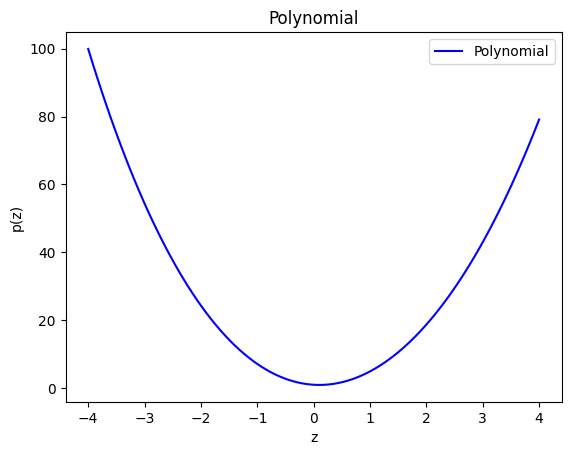

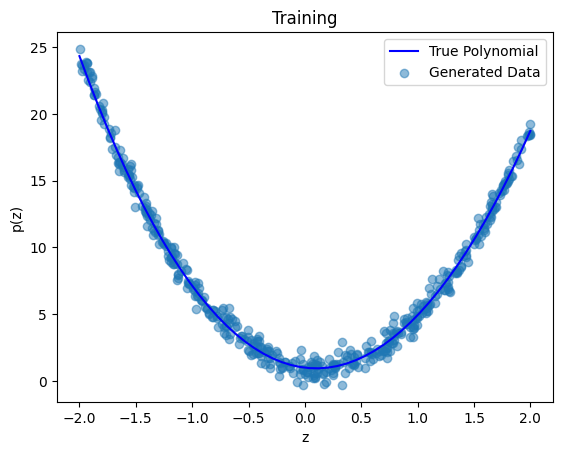

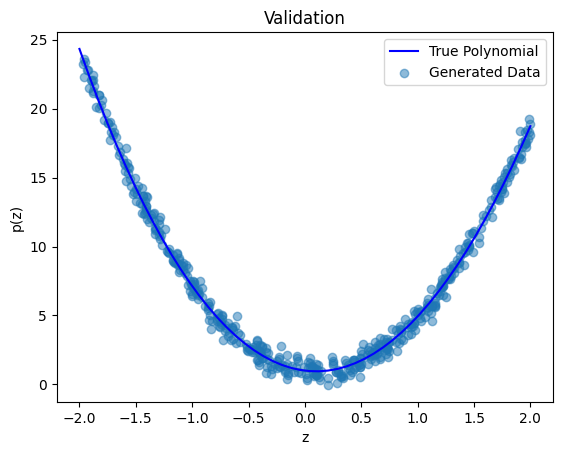

<Figure size 640x480 with 0 Axes>

In [5]:
'''
Code for Q1
'''
# assert np.version.version=="2.1"


'''
Code for Q2
'''
coeffs = np.array([1, -1, 5, -0.1, 1/30])  # [w_0, w_1, w_2, w_3, w_4]
plot_polynomial(coeffs, (-4, 4))


'''
Code for Q4
'''
sigma = 0.5
train_sample_size = 500
train_seed = 0
val_sample_size = 500
val_seed = 1
z_range = (-2,2)

X_train, y_train = create_dataset(coeffs, z_range, train_sample_size, sigma, train_seed)
X_val, y_val = create_dataset(coeffs, z_range, val_sample_size, sigma, val_seed)

'''
Code for Q5
'''
visualize_data(X_train, y_train, coeffs, z_range, "Training")
visualize_data(X_val, y_val, coeffs, z_range, "Validation")

In [21]:
#if __name__ == "__main__":


'''
Code for Q6
'''
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')

model = nn.Linear(5, 1, False) # Dimension of input: 5, dimension of output: 1
  # Bias = True (defalut) loss il lower
  # Bias = False, loss value is way more higher
loss_fn = nn.MSELoss()
learning_rate = 0.03 # Start with 5 like in DL_03 but to high => to loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# reshape non necessario perchè usando stack fa già in 2D
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
#model = model

# non to(DEVICE) non serve GPU

n_steps=600 # 100

train_loss_vals = []
val_loss_vals = []

weight_list = []
bias_list = []

for step in range(n_steps): # Number of updates of the gradient
  model.train() # Set the model in training mode
  # Set the gradient to 0
  optimizer.zero_grad() # Or model.zero_grad()
  # Compute the output of the model
  y_hat = model(X_train)
  # Compute the loss
  loss = loss_fn(y_hat, y_train)

  # Compute the gradient
  loss.backward()
  # Update the parameters
  optimizer.step()
  with torch.no_grad():
    # Compute the output of the model
    y_hat_val = model(X_val)
    # Compute the loss
    loss_val = loss_fn(y_hat_val, y_val)

    val_loss_vals.append(loss_val.item())
    train_loss_vals.append(loss.item())

    weight_list.append(model.weight.flatten().tolist())
    # bias_list.append(model.bias.tolist())

    # At every step, print the losses
print("Step:", step, "- Loss eval:", loss_val.item(), "- Loss train:", loss.item())

# Get the final value of the parameters
print("Final w:", model.weight, "Final b:\n", model.bias)

torch.Size([500, 5])
torch.Size([500, 1])
torch.Size([500, 5])
torch.Size([500, 1])
Step: 599 - Loss eval: 0.26122593879699707 - Loss train: 0.27789705991744995
Final w: Parameter containing:
tensor([[ 1.0920, -1.0085,  4.7739, -0.1084,  0.1039]], requires_grad=True) Final b:
 None


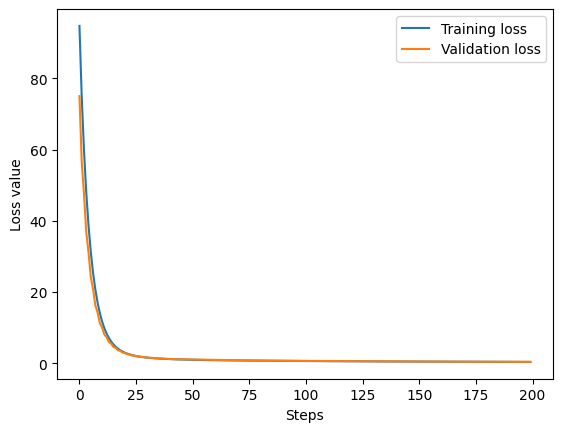

<Figure size 640x480 with 0 Axes>

In [11]:
'''
Code for Q7
'''
plt.plot(range(step + 1), train_loss_vals)
plt.plot(range(step + 1), val_loss_vals)
plt.legend(["Training loss", "Validation loss"])
plt.xlabel("Steps")
plt.ylabel("Loss value")
plt.show()
plt.savefig("Loss")

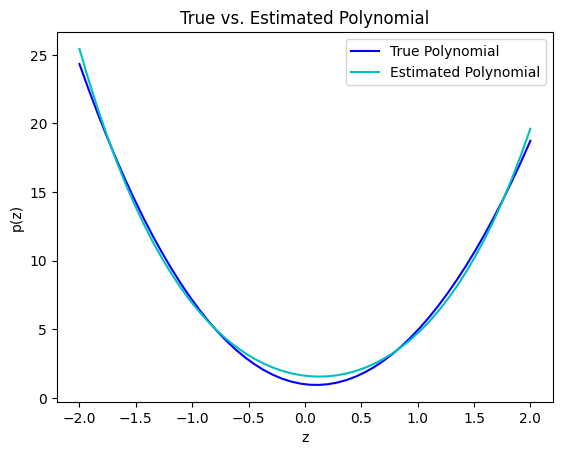

<Figure size 640x480 with 0 Axes>

In [12]:
'''
Code for Q8
'''

z_min, z_max = (-2,2)
z = np.linspace(z_min, z_max)
# Compute the true polynomial
y_true = np.polyval(coeffs[::-1], z)

est_weight = model.weight.flatten().tolist()
#est_bias = model.bias.tolist()
est_coeffs = est_weight[::-1]

# Compute the estimated polynomial
# (1 * est_weight[4] + z * est_weight[3] + z**2 * est_weight[2] + z**3 * est_weight[1] + z**4 * est_weight[0] + est_bias[0])
est_y = np.polyval(est_coeffs, z)
# +[est_bias[0]]


plt.plot(z, y_true, color='b', label='True Polynomial')
plt.plot(z, est_y, color='c', label='Estimated Polynomial')
plt.title("True vs. Estimated Polynomial")
plt.xlabel('z')
plt.ylabel('p(z)')
plt.legend()
plt.show()
plt.savefig("True vs estimated")

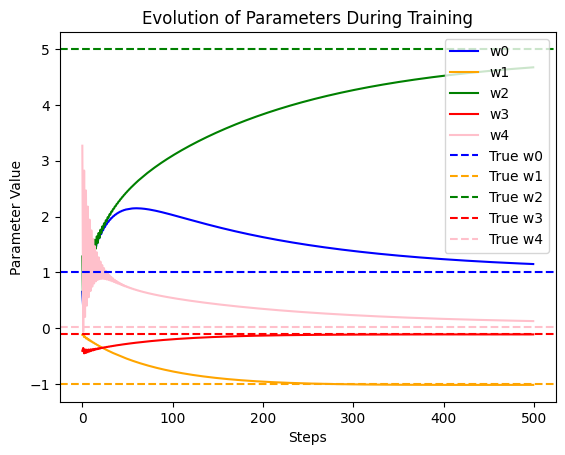

<Figure size 640x480 with 0 Axes>

In [19]:
'''
Code for Q9
'''
weight_array = np.array(weight_list)

# Plotta i pesi
plt.plot(np.arange(n_steps), weight_array[:, 0], label=f'w0', color='blue')
plt.plot(np.arange(n_steps), weight_array[:, 1], label=f'w1', color='orange')
plt.plot(np.arange(n_steps), weight_array[:, 2], label=f'w2', color='green')
plt.plot(np.arange(n_steps), weight_array[:, 3], label=f'w3', color='red')
plt.plot(np.arange(n_steps), weight_array[:, 4], label=f'w4', color='pink')


# Aggiungi linee orizzontali per i valori veri
plt.axhline(y=coeffs[0], linestyle='--', label=f'True w0', color='blue')
plt.axhline(y=coeffs[1], linestyle='--', label=f'True w1', color='orange')
plt.axhline(y=coeffs[2], linestyle='--', label=f'True w2', color='green')
plt.axhline(y=coeffs[3], linestyle='--', label=f'True w3', color='red')
plt.axhline(y=coeffs[4], linestyle='--', label=f'True w4', color='pink')

plt.xlabel('Steps')
plt.ylabel('Parameter Value')
plt.title('Evolution of Parameters During Training')
plt.legend()
plt.show()
plt.savefig("parameters")